# San Diego County Rental Dataset
---

In [25]:
# 1. Setup - San Diego Rental Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
ignore_warnings = warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Set a San Diego beach/sunset style
sns.set_theme(style="whitegrid", palette="pastel")

# Custom San Diego Colors for plots
san_diego_colors = ['#00BFFF', '#FFD700', '#FFA07A', '#20B2AA', '#FF6347']

# Matplotlib default figure size and color tweaks
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=san_diego_colors)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14

# Display settings for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

# Load the dataset
file_path = 'san_diego_county_rentals_2025-04-28.csv'
df = pd.read_csv(file_path)

# Quick peek
df.head()


,Property,Address,City,State,ZipCode,Phone,Unit,Beds,Baths,Beds_Baths,SqFt,Price,PricePerSqFt,RentalType,HasWasherDryer,HasAirConditioning,HasPool,HasSpa,HasGym,HasEVCharging,AllowsDogs,AllowsCats,ListingURL
0,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1413,1,1.0,1 Bed / 1 Bath,658.0,3157.0,4.80,Apartment,True,True,True,False,True,False,False,False,https://www.apartments.com/radian-san-diego-ca...
1,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1513,1,1.0,1 Bed / 1 Bath,658.0,3182.0,4.84,Apartment,True,True,True,False,True,False,False,False,https://www.apartments.com/radian-san-diego-ca...
2,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1613,1,1.0,1 Bed / 1 Bath,658.0,3233.0,4.91,Apartment,True,True,True,False,True,False,False,False,https://www.apartments.com/radian-san-diego-ca...
3,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1210,1,1.0,1 Bed / 1 Bath,808.0,3320.0,4.11,Apartment,True,True,True,False,True,False,False,False,https://www.apartments.com/radian-san-diego-ca...
4,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1510,1,1.0,1 Bed / 1 Bath,808.0,3620.0,4.48,Apartment,True,True,True,False,True,False,False,False,https://www.apartments.com/radian-san-diego-ca...


Quick notes about what I see:
- Properties have unit-level granularity (`Unit 1413`, `Unit 1513`, etc.)
- Important numeric fields like `Price`, `SqFt`, `Beds`, `Baths` are **already numeric**
- **Amenities** (e.g., `HasWasherDryer`, `HasPool`, etc.) are neatly boolean (`True/False`)
- **City** is extracted and consistent ("San Diego" for this batch)

## Initial Exploration Block

---

In [26]:
# Overview of San Diego Rental Listings

# How many rows and columns?
print(f"Total listings: {df.shape[0]:,}")
print(f"Total columns: {df.shape[1]}")

# Data types
print("\nColumn Data Types:")
print(df.dtypes)

# Missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Quick Statistics for Numeric Columns
print("\nSummary Statistics:")
display(df.describe())


Total listings: 13,321
Total columns: 23

Column Data Types:
Property               object
Address                object
City                   object
State                  object
ZipCode                 int64
Phone                   int64
Unit                   object
Beds                    int64
Baths                 float64
Beds_Baths             object
SqFt                  float64
Price                 float64
PricePerSqFt          float64
RentalType             object
HasWasherDryer           bool
HasAirConditioning       bool
HasPool                  bool
HasSpa                   bool
HasGym                   bool
HasEVCharging            bool
AllowsDogs               bool
AllowsCats               bool
ListingURL             object
dtype: object

Missing Values per Column:
Property               0
Address                0
City                   0
State                  0
ZipCode                0
Phone                  0
Unit                   0
Beds                   0
Baths  

,ZipCode,Phone,Beds,Baths,SqFt,Price,PricePerSqFt
count,13321.000000,1.332100e+04,13321.000000,13321.000000,13234.000000,13313.000000,13226.000000
mean,92070.681631,7.118136e+09,1.480519,1.458674,866.469850,3051.133929,3.667495
std,69.823745,1.418929e+09,0.775042,0.570746,280.356059,1181.066813,0.996179
min,91901.000000,2.055283e+09,0.000000,0.500000,85.000000,850.000000,0.540000
25%,92027.000000,6.194943e+09,1.000000,1.000000,671.000000,2495.000000,3.050000
50%,92101.000000,6.199326e+09,1.000000,1.000000,828.000000,2875.000000,3.500000
75%,92115.000000,8.583025e+09,2.000000,2.000000,1024.000000,3390.000000,4.060000
max,92508.000000,9.492391e+09,4.000000,4.000000,3195.000000,19724.000000,17.940000


---

### Summary of What We See

| Category               | Value/Observation |
|------------------------|------------------|
| **Listings**           | 13,321 total |
| **Columns**            | 23 |
| **Price Range**        | $850 – $19,724 (likely luxury units at the top end) |
| **Square Footage**     | 85 – 3,195 sq ft (good variety!) |
| **Beds/Baths**         | 0–4 beds and 0.5–4 baths (studio through large homes) |
| **Missing Values**     | Just 87 `SqFt` and 8 `Price` missing (clean!) |
| **Price per SqFt**     | Median ~$3.50, Max ~$17.94 (wow, very high-end) |

---

### Interpretation

- **Most units** are 1–2 beds, 1–2 baths
- **Median size** is ~828 sq ft — typical for apartments
- **Median rent** is $2,875 — under the $4,000 filter, but still high
- The data is **clean enough to move forward** with analysis — we just need to drop ~95 rows

---

### Next Step: Clean and Prep for Analysis

We’ll:
1. Drop rows missing `Price` or `SqFt`
2. Recalculate `PricePerSqFt` for safety

---

## Quick Missing Value Heatmap?

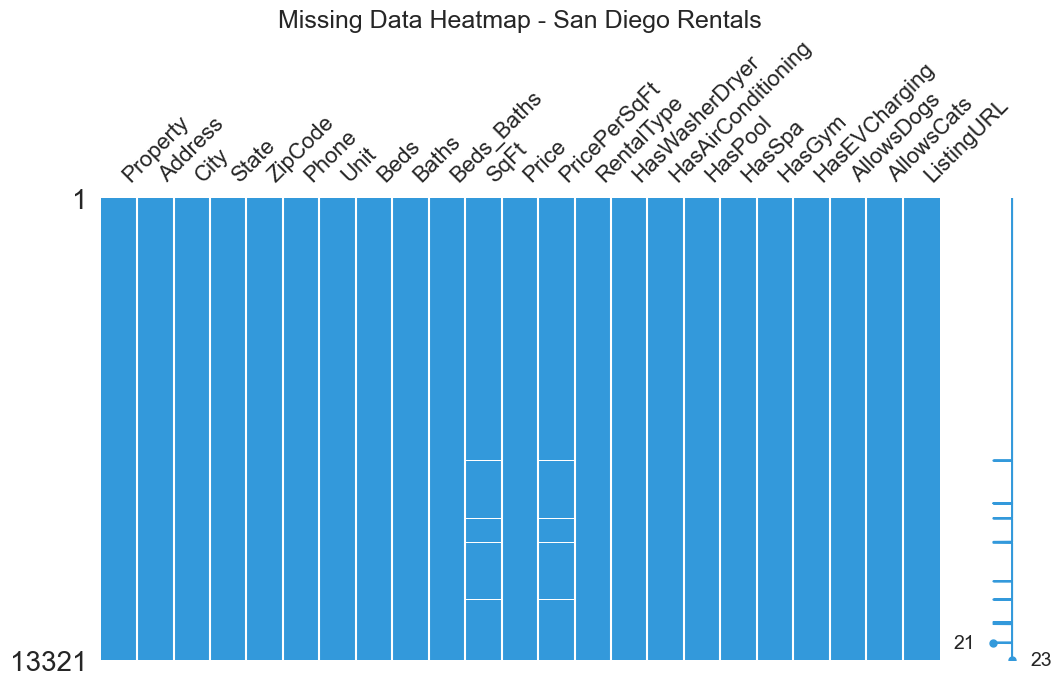

In [27]:
# 3. Visualizing Missing Data - ☀️ Heatmap View

import missingno as msno

# Light San Diego palette
msno.matrix(df, figsize=(12,6), color=(0.2, 0.6, 0.86))  # Ocean blue 🌊
plt.title('Missing Data Heatmap - San Diego Rentals', fontsize=18)
plt.show()

## Clean and Prep for Analysis

In [28]:
# Drop listings with missing Price or SqFt
df_clean = df.dropna(subset=['Price', 'SqFt']).copy()

# Recalculate PricePerSqFt
df_clean['PricePerSqFt'] = df_clean.apply(
    lambda row: round(row['Price'] / row['SqFt'], 2)
    if pd.notnull(row['Price']) and pd.notnull(row['SqFt']) and row['SqFt'] > 0 else None,
    axis=1
)

# Confirm shape
print(f"Listings after cleanup: {df_clean.shape[0]:,}")
print(f"Any missing PricePerSqFt? {df_clean['PricePerSqFt'].isnull().sum()} rows")


Listings after cleanup: 13,226
Any missing PricePerSqFt? 0 rows



## Rental Price Distribution & Outliers

Let’s explore:
- Distribution of monthly rent prices
- Spot expensive vs affordable units
- Zoomed-in view under $6,000 to reduce outlier distortion

---


### San Diego Rental Price Visuals:

#### Rental Price Distribution (All Listings)

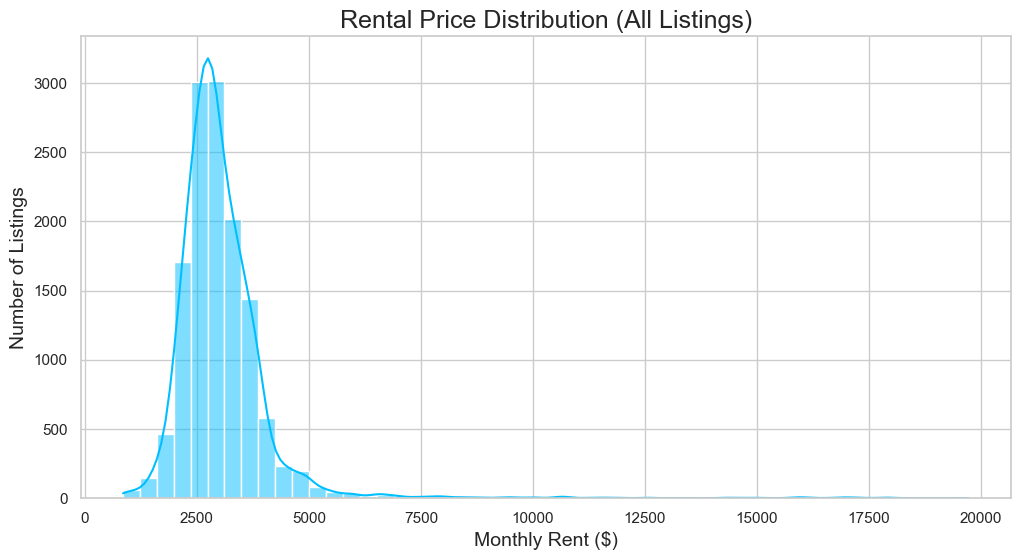

In [29]:
# Rental Price Distribution - Full Range
plt.figure(figsize=(12,6))
sns.histplot(df_clean['Price'], bins=50, kde=True)
plt.title('Rental Price Distribution (All Listings)', fontsize=18)
plt.xlabel('Monthly Rent ($)')
plt.ylabel('Number of Listings')
plt.show()

### Key Takeaways:

#### 1. **Most Rentals Cluster Between $2,200–$3,800**
- This is the **heart of the market** — you can clearly see a strong concentration in this range.
- These are likely **1–2 bedroom apartments**, making them the most common rental type.

#### 2. **The Peak is Around $2,800–$3,200**
- The market **mode (most frequent range)** is here.
- This lines up with the **median value** of $2,875 from our earlier stats.

#### 3. **Right-Skewed Distribution**
- The **long tail to the right** (stretching up to ~$20,000) shows there are a **small number of ultra-premium listings** — likely penthouses, large homes, or luxury apartments.
- These outliers pull up the **mean rent (~$3,051)** above the median.

#### 4. **Data is Clean**
- No strange spikes, gaps, or unexpected clusters — a smooth, realistic curve.

---

### What This Tells Us:

- The **San Diego rental market is expensive**, with most listings well above $2,500/month.
- There’s a **healthy distribution**, but luxury listings cause skew.
- Great candidate for further segmentation (e.g., by city, zip, bedroom count, or amenities).

---

#### Rental Price Distrubution (< $6,000)

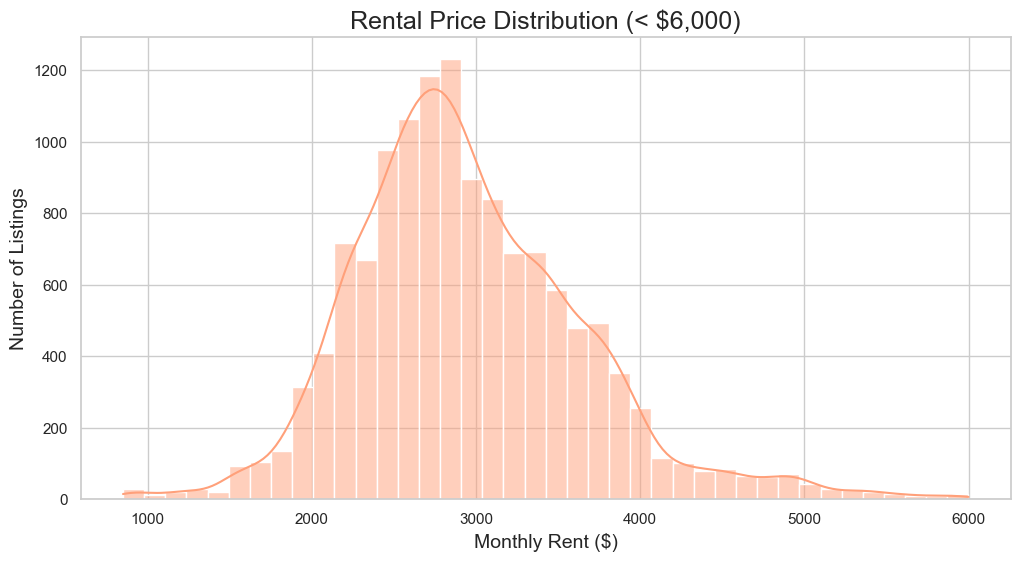

In [30]:
# 🌞 Zoomed In (under $6,000)
plt.figure(figsize=(12,6))
sns.histplot(df_clean[df_clean['Price'] < 6000]['Price'], bins=40, kde=True, color='#FFA07A')
plt.title('Rental Price Distribution (< $6,000)', fontsize=18)
plt.xlabel('Monthly Rent ($)')
plt.ylabel('Number of Listings')
plt.show()



### Key Insights:

#### 1. **The Market Sweet Spot is $2,600–$3,200**
- This is the **peak** of the curve, with the **most common rents**.
- Reflects the **average asking price** for 1–2 bed apartments across the county.

####  2. **Skew Still Present — But Much Less Severe**
- By excluding ultra-luxury units, we now see a more **normal distribution shape**.
- There's a **gentle slope down** past $3,500, showing fewer larger or premium units.

#### 3. **Affordable Units Exist, But Are Rare**
- Listings under $1,800/month are very limited.
- Likely older buildings, smaller studios, or remote locations in the county.

#### 4. **Balanced View for Analysis**
- This view is perfect for modeling or comparing pricing tiers — no distortion from outliers like $19K listings.

---

### Recommendation

We'll keep **this filtered view** in mind when:
- Creating **summary tables** for 1–4 beds
- Looking at **city-level medians**
- Building **scatterplots or models** later on

---

#### Monthly Rent - Boxplot (Outliers Visible)

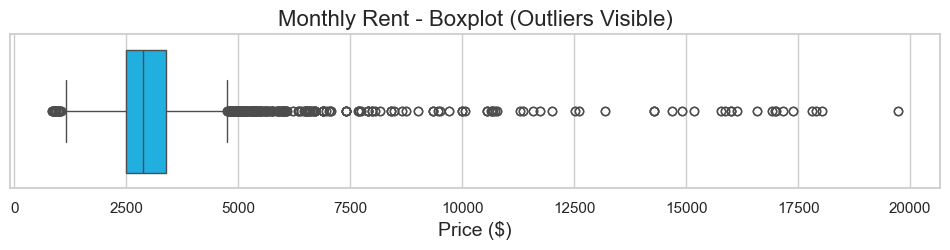

In [31]:
# 💸 Boxplot to catch outliers
plt.figure(figsize=(12,2))
sns.boxplot(data=df_clean, x='Price', color='#00BFFF')
plt.title('Monthly Rent - Boxplot (Outliers Visible)', fontsize=16)
plt.xlabel('Price ($)')
plt.show()

### What We Learn:

#### 1. **Median Rent Around $2,800–$3,000**
- Most listings fall around this range — matching our earlier histogram/kde insights.

#### 2. **Tight IQR (Most Listings Between ~$2,200 and ~$3,900)**
- That tight box means **rents are fairly concentrated** — especially for 1–2 bedroom units.

#### 3. **Outliers Are Abundant**
- Dozens of listings **above $6,000**, some approaching **$20,000/month**.
- These are likely:
  - Luxury penthouses
  - Ocean-view properties
  - Multi-bedroom homes in La Jolla or Del Mar

#### 4. **Data Has Positive Skew**
- Most data is **on the lower end**, but the right tail pulls the mean up.

---

### Why This Matters:

- Reinforces the value of **zoomed-in analysis** and **filters by bed count or city**
- Suggests that for modeling or price predictions, we may want to **cap or transform** extreme values
- Great visual to show **income disparity or housing cost pressure** in San Diego

### Bedrooms vs. Rent - San Diego Rentals

In [36]:
# Group summary
bedroom_summary = df_clean.groupby('Beds')['Price'].agg(['count', 'mean', 'median']).reset_index()
bedroom_summary.columns = ['Beds', 'Listings', 'AvgPrice', 'MedianPrice']
bedroom_summary.sort_values('Beds', inplace=True)

print("Bedrooms vs. Average Rent")
display(bedroom_summary)

Bedrooms vs. Average Rent


,Beds,Listings,AvgPrice,MedianPrice
0,0,1196,2337.104515,2295.0
1,1,5537,2749.519054,2717.0
2,2,5535,3353.573803,3163.0
3,3,873,4225.935853,3820.0
4,4,85,1477.517647,1299.0


**Insights:**

- A 2-bed unit costs ~22% more than a 1-bed — good value benchmark

- Studios and 1-beds dominate the rental landscape (>50% of listings)

- Rent scales predictably until the odd 4-bed dip

#### Bar Chart: Avg Rent by Beds (Future-safe)

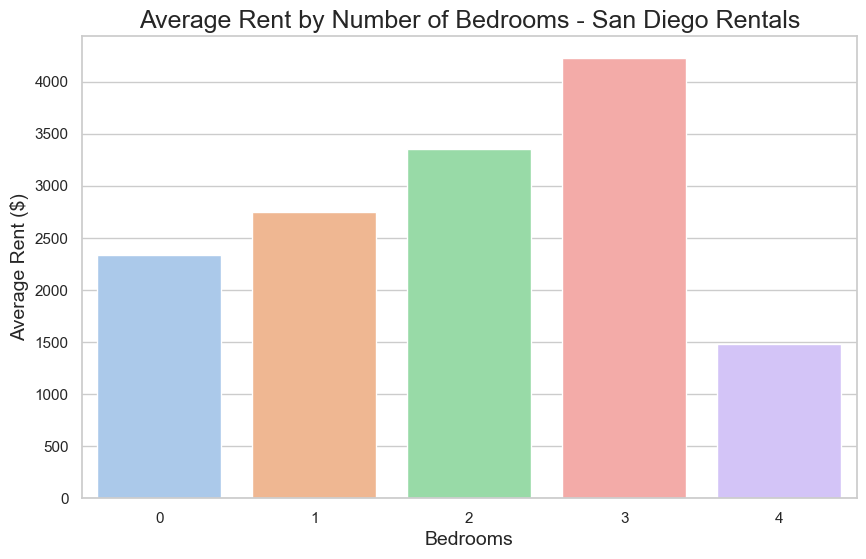

In [34]:
# Bar Chart: Avg Rent by Beds (Future-safe)
plt.figure(figsize=(10,6))
sns.barplot(data=bedroom_summary, x='Beds', y='AvgPrice', hue='Beds', legend=False, palette='pastel')
plt.title('Average Rent by Number of Bedrooms - San Diego Rentals', fontsize=18)
plt.xlabel('Bedrooms')
plt.ylabel('Average Rent ($)')
plt.show()


**Takeaways from “Average Rent by Number of Bedrooms”**

1. **Consistent Increase from 0 → 3 Beds**
- Average rent rises steadily:
  - 🛏️ **Studio (0 bed):** ~$2,337  
  - 🛏️ **1 bed:** ~$2,750  
  - 🛏️ **2 bed:** ~$3,350  
  - 🛏️ **3 bed:** ~$4,226
- Reflects normal market behavior: more space = higher cost.

2. **4 Beds = Major Anomaly**
- Average drops sharply to **~$1,478** — **far lower than even studios**.
- This is highly unrealistic in San Diego, where 4-bedroom units often exceed **$4,000–$6,000/month**.

**Likely Causes for 4-Bed Outliers:**
- Misparsed values (e.g., scraped rent per room or invalid price)
- Incorrect price formatting or placeholders (e.g., `$1`, `$1000`)
- Listings with shared housing, student housing, or partial listings

#### Boxplot: Price Distribution by Bedroom Count (Future-safe)

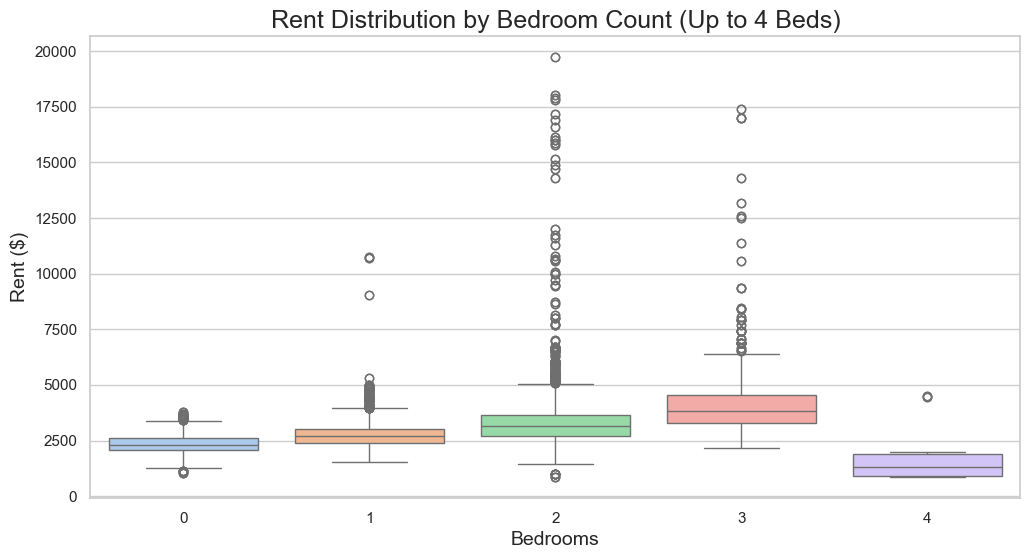

In [35]:
# Boxplot: Price Distribution by Bedroom Count (Future-safe)
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_clean[df_clean['Beds'] <= 4],
    x='Beds',
    y='Price',
    hue='Beds',
    palette='pastel',
    legend=False
)
plt.title('Rent Distribution by Bedroom Count (Up to 4 Beds)', fontsize=18)
plt.xlabel('Bedrooms')
plt.ylabel('Rent ($)')
plt.show()


**Actionable Takeaways:**

- **2-bed units** show the greatest **price variability** — a mix of standard apartments and high-end condos/homes.

- **3-bed and 4-bed units** bring the most outliers — great candidates for filtering or segmenting by rental type (`House`, `Apartment`, etc.).

- The **4-bed pricing anomaly** needs cleaning — filtering listings < $2,000 and cross-checking by rental type would help.

### Washer/Dryer Impact on Rent

In [48]:
# 🧺 Washer/Dryer In Unit vs Rent - with Difference Column and Takeaways

# Group summary
laundry_summary = df_clean.groupby('HasWasherDryer')['Price'].agg(['count', 'mean', 'median']).reset_index()
laundry_summary.columns = ['HasWasherDryer', 'Listings', 'AvgRent', 'MedianRent']

# Map True/False to Yes/No
laundry_summary['HasWasherDryer'] = laundry_summary['HasWasherDryer'].replace({True: 'Yes', False: 'No'})

# Sort so 'No' comes first
laundry_summary = laundry_summary.sort_values(by='HasWasherDryer')

# Calculate rent difference from 'No' baseline
baseline_rent = laundry_summary.loc[laundry_summary['HasWasherDryer'] == 'No', 'AvgRent'].values[0]
laundry_summary['DiffFromNo'] = laundry_summary['AvgRent'] - baseline_rent
laundry_summary['PercentDiff'] = (laundry_summary['DiffFromNo'] / baseline_rent) * 100

# Round for display
laundry_summary[['AvgRent', 'MedianRent', 'DiffFromNo', 'PercentDiff']] = laundry_summary[[ 
    'AvgRent', 'MedianRent', 'DiffFromNo', 'PercentDiff']].round(2)

# Show summary table
print("🧼 Washer/Dryer In Unit vs. Rent with Differences:")
display(laundry_summary)

🧼 Washer/Dryer In Unit vs. Rent with Differences:


,HasWasherDryer,Listings,AvgRent,MedianRent,DiffFromNo,PercentDiff
0,No,5323,2890.02,2680.0,0.00,0.00
1,Yes,7903,3164.94,2991.0,274.92,9.51


**Key Takeaways:**
- Listings **with in-unit laundry** make up 7903 out of 13226 total listings.
- Units with in-unit laundry have an **average rent of $3,164.94**, compared to $2,890.02 for those without.
- That’s a **$274.92 increase**, or **9.5% more** on average.
- In-unit laundry adds clear rental value and is present in the majority of listings.

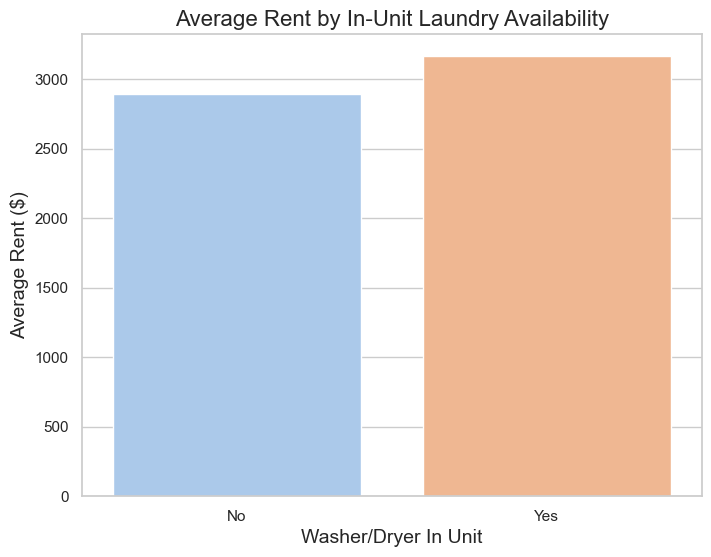

In [42]:
# 📊 Bar Plot: Average Rent Comparison
plt.figure(figsize=(8,6))
sns.barplot(
    data=laundry_summary,
    x='HasWasherDryer',
    y='AvgRent',
    hue='HasWasherDryer',
    legend=False,
    palette='pastel'
)
plt.title('Average Rent by In-Unit Laundry Availability', fontsize=16)
plt.xlabel('Washer/Dryer In Unit')
plt.ylabel('Average Rent ($)')
plt.show()

**Key Takeaways**
1. **Noticeable Price Bump**
- With laundry: ~$3,165/month
- Without laundry: ~$2,890/month
- That’s a ~$275/month increase, or ~9.5% premium for having in-unit laundry.

2. Common Amenity
- The dataset shows more listings have in-unit laundry than not (~60%+).
- Suggests in-unit laundry is becoming a standard expectation in modern San Diego rentals.

3. **Renters Pay More for Comfort**
- In-unit laundry likely attracts:
    - Families
    - Remote workers
    - Professionals
- The pricing reflects its high perceived value — especially in urban areas where shared laundry is inconvenient.

4. **Landlord & Investor Implication**
- Installing in-unit laundry can justify higher rent
- Offers a tangible ROI opportunity for property owners in competitive neighborhoods

---
**Summary**
- In-unit laundry increases average rent by over $270/month, making it one of the most financially impactful amenities in San Diego County rentals.
---

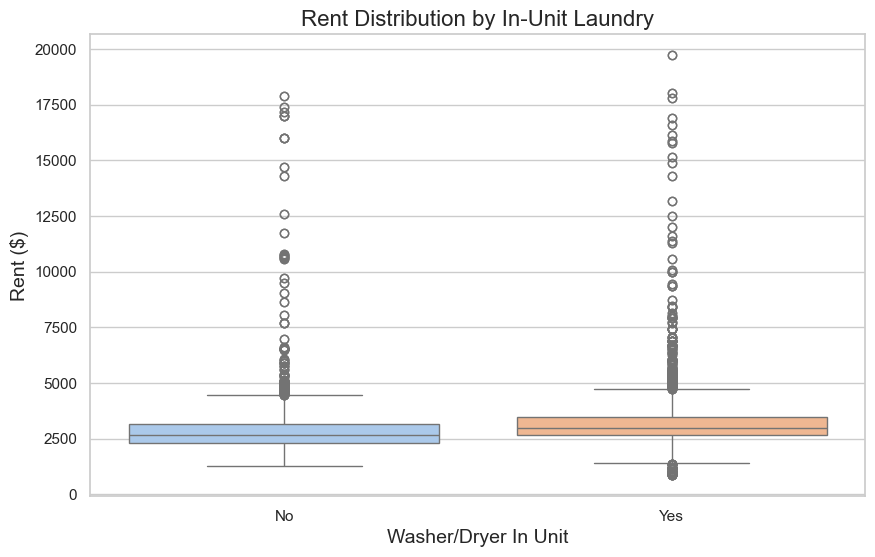

In [41]:
# 📦 Boxplot: Rent Distribution by Washer/Dryer
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_clean,
    x='HasWasherDryer',
    y='Price',
    hue='HasWasherDryer',
    legend=False,
    palette='pastel'
)
plt.title('Rent Distribution by In-Unit Laundry', fontsize=16)
plt.xlabel('Washer/Dryer In Unit')
plt.ylabel('Rent ($)')
plt.xticks([0, 1], ['No', 'Yes'])  # Optional: nicer labeling
plt.show()

**Boxplot Insights: In-Unit Washer/Dryer vs. Rent**

1. **Units with In-Unit Laundry Tend to Be More Expensive**
- The entire box for **"Yes"** is shifted upward.
- The **median rent** (line inside the box) is clearly **higher** for units with laundry.
- This confirms the previous summary: units with in-unit laundry cost on average **~$275 more per month**.

2. **Wider Rent Spread for Units with In-Unit Laundry**
- The **IQR (middle 50%)** of rent is wider for "Yes" listings — indicating more pricing diversity.
- Likely due to these units being more **common in newer or premium buildings**, which can range widely in cost.

3. **More High-End Outliers with In-Unit Laundry**
- The number of **luxury outliers** (those dots beyond the whiskers) is noticeably higher for listings with laundry.
- Suggests this amenity is **almost expected** in high-end rentals.

4. **No-Laundry Units Are Cheaper and Tightly Clustered**
- Lower overall rent levels
- Fewer outliers and a narrower range
- Often found in older buildings, ADUs, or studio-heavy properties

---

### Summary Takeaway:
- In-unit laundry **correlates strongly with higher rent**, broader rent variability, and a higher chance of premium listing pricing. It's both a **costly amenity** and a **signal of modern unit quality**.

---

In [57]:
# Reusable Amenity Rent Analysis Function (Fixed)
def analyze_amenity_rent(df, amenity_col, amenity_label):
    print(f"\n{amenity_label} vs. Rent\n" + "-"*40)

    # Summary table
    summary = df.groupby(amenity_col)['Price'].agg(['count', 'mean', 'median']).reset_index()
    summary.columns = ['Amenity', 'Listings', 'AvgRent', 'MedianRent']
    
    # Convert True/False to Yes/No for presentation
    summary['AmenityLabel'] = summary['Amenity'].replace({True: 'Yes', False: 'No'})

    # Sort and calculate difference
    summary = summary.sort_values(by='AmenityLabel')
    baseline = summary.loc[summary['AmenityLabel'] == 'No', 'AvgRent'].values[0]
    summary['DiffFromNo'] = summary['AvgRent'] - baseline
    summary['PercentDiff'] = (summary['DiffFromNo'] / baseline) * 100

    # Round for display
    summary[['AvgRent', 'MedianRent', 'DiffFromNo', 'PercentDiff']] = summary[[
        'AvgRent', 'MedianRent', 'DiffFromNo', 'PercentDiff']].round(2)

    # Show summary
    display(summary[['AmenityLabel', 'Listings', 'AvgRent', 'MedianRent', 'DiffFromNo', 'PercentDiff']])

    # Takeaways
    if 'Yes' in summary['AmenityLabel'].values:
        yes_row = summary[summary['AmenityLabel'] == 'Yes'].iloc[0]
        print(f"{amenity_label} Takeaways:")
        print(f"• Listings with {amenity_label.lower()} = {yes_row['Listings']} (out of {summary['Listings'].sum()})")
        print(f"• Avg rent with {amenity_label.lower()}: ${yes_row['AvgRent']:,.2f}")
        print(f"• Rent is ${yes_row['DiffFromNo']:,.2f} higher ({yes_row['PercentDiff']:.1f}%) compared to units without it.")
    else:
        print(f"No listings found with '{amenity_label}' set to True.")


In [58]:
analyze_amenity_rent(df_clean, 'HasAirConditioning', 'Air Conditioning')
analyze_amenity_rent(df_clean, 'HasPool', 'Pool Access')



Air Conditioning vs. Rent
----------------------------------------


,AmenityLabel,Listings,AvgRent,MedianRent,DiffFromNo,PercentDiff
0,No,3606,2964.17,2734.0,0.00,0.00
1,Yes,9620,3088.08,2915.0,123.91,4.18


Air Conditioning Takeaways:
• Listings with air conditioning = 9620 (out of 13226)
• Avg rent with air conditioning: $3,088.08
• Rent is $123.91 higher (4.2%) compared to units without it.

Pool Access vs. Rent
----------------------------------------


,AmenityLabel,Listings,AvgRent,MedianRent,DiffFromNo,PercentDiff
0,No,2213,2900.96,2769.0,0.00,0.00
1,Yes,11013,3085.11,2895.0,184.15,6.35


Pool Access Takeaways:
• Listings with pool access = 11013 (out of 13226)
• Avg rent with pool access: $3,085.11
• Rent is $184.15 higher (6.3%) compared to units without it.


**Air Conditioning**
- ✅ Present in **~73%** of listings (9,620 of 13,226)
- 🧊 **+4.2% rent premium** ($124 more per month)
- 💡 **Moderate but meaningful boost** in value, especially likely in inland or newer buildings

---

**Pool Access**
- ✅ Found in **~83%** of listings — very common
- 🌴 **+6.3% rent premium** ($184 more/month)
- 💡 **Stronger price impact than AC**, often bundled with other luxury amenities (e.g. gym, spa, etc.)

---

### Takeaways Summary

| Amenity         | % of Listings | Avg Rent Lift | % Increase | Notes |
|------------------|----------------|----------------|-------------|-------|
| AC ❄️            | 73%            | +$124          | +4.2%       | Moderate value |
| Pool 🏊          | 83%            | +$184          | +6.3%       | Strong value |